In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('/home/dudunene/Downloads/planilha_geral.csv')

df.columns = ['Empresa','Trimestre','Receita Liquida','Custos','Lucro/Prejuizo','Despesas operacionais',
             'Despesas com vendas','Despesas gerais e administrativas']

In [79]:
df['Despesas com vendas'] = np.abs(df['Despesas com vendas'])

In [82]:
df[['Empresa','Trimestre','Receita Liquida','Lucro/Prejuizo','Despesas com vendas']].head()

,Empresa,Trimestre,Receita Liquida,Lucro/Prejuizo,Despesas com vendas
0,Americanas,31/03/2016,3933169,-82792,538284
1,Americanas,30/06/2016,3942930,3539,586699
2,Americanas,30/09/2016,3966216,-109356,556458
3,Americanas,31/12/2016,6261197,216437,739738
4,Americanas,31/03/2017,3570462,-199786,552716


In [87]:
# médias

print('Média das receitas líquidas: {:.1f}'.format(np.mean(df['Receita Liquida'])))
print('Média dos lucros/prejuízos: {:.1f}'.format(np.mean(df['Lucro/Prejuizo'])))
print('Média das despesas com vendas: {:.1f}'.format(np.mean(df['Despesas com vendas'])))

Média das receitas líquidas: 2236679.6
Média dos lucros/prejuízos: 34341.8
Média das despesas com vendas: 479143.0


In [103]:
#percentis

percentis = np.arange(0,125,25)
    
for variavel in ['Receita Liquida','Lucro/Prejuizo','Despesas com vendas']:
    
    print('Para {}: \n'.format(variavel))
    
    for percentil in percentis:
        
        print('{} percentil: {:.0f}'.format(percentil, np.trunc(np.percentile(df[variavel],percentil))))
    
    print('\n')

Para Receita Liquida: 

0 percentil: 27702
25 percentil: 406189
50 percentil: 1615462
75 percentil: 3615398
100 percentil: 10065793


Para Lucro/Prejuizo: 

0 percentil: -854000
25 percentil: -46694
50 percentil: 14339
75 percentil: 73017
100 percentil: 1012149


Para Despesas com vendas: 

0 percentil: 10064
25 percentil: 108952
50 percentil: 384808
75 percentil: 693581
100 percentil: 1992000




In [114]:
# coeficientes de variância globais

for variavel in ['Receita Liquida','Lucro/Prejuizo','Despesas com vendas']:
    
    print('Coeficiente de variância para {}: {:.2f}% \n'.format(
            variavel,np.std(df[variavel])/np.mean(df[variavel])*100))


Coeficiente de variância para Receita Liquida: 99.41% 

Coeficiente de variância para Lucro/Prejuizo: 533.67% 

Coeficiente de variância para Despesas com vendas: 91.09% 



In [123]:
# média dos coeficientes de variância locais (de cada empresa):


for coluna in ['Receita Liquida', 'Despesas com vendas','Lucro/Prejuizo']:
    
    coef_list = []
    
    i = 0

    f = 20
    
    print('\n\nCoeficientes de variação locais para {}: \n'.format(coluna))

    for c in range(0,10):

        fracao_df = df.iloc[i:f,:]

        varCoef = np.std(fracao_df[coluna])/np.mean(fracao_df[coluna])

        print('Coeficiente de variação local para {} : {:.2f}% '.format(df['Empresa'].unique()[c],varCoef*100))
        
        coef_list.append(varCoef)

        i += 20

        f += 20
        
    print('\nCoeficiente de variação local médio: {:.2f}%'.format(np.mean(coef_list)*100))



Coeficientes de variação locais para Receita Liquida: 

Coeficiente de variação local para Americanas : 23.56% 
Coeficiente de variação local para Via Varejo : 19.22% 
Coeficiente de variação local para Magazineluiza : 46.49% 
Coeficiente de variação local para B2W : 35.77% 
Coeficiente de variação local para Lojas Renner : 29.23% 
Coeficiente de variação local para Guararapes : 21.40% 
Coeficiente de variação local para Marisa : 19.51% 
Coeficiente de variação local para Arezzo : 25.00% 
Coeficiente de variação local para Saraiva : 57.65% 
Coeficiente de variação local para Grazziotion : 19.82% 

Coeficiente de variação local médio: 29.76%


Coeficientes de variação locais para Despesas com vendas: 

Coeficiente de variação local para Americanas : 31.26% 
Coeficiente de variação local para Via Varejo : 16.89% 
Coeficiente de variação local para Magazineluiza : 44.15% 
Coeficiente de variação local para B2W : 37.94% 
Coeficiente de variação local para Lojas Renner : 26.20% 
Coeficien

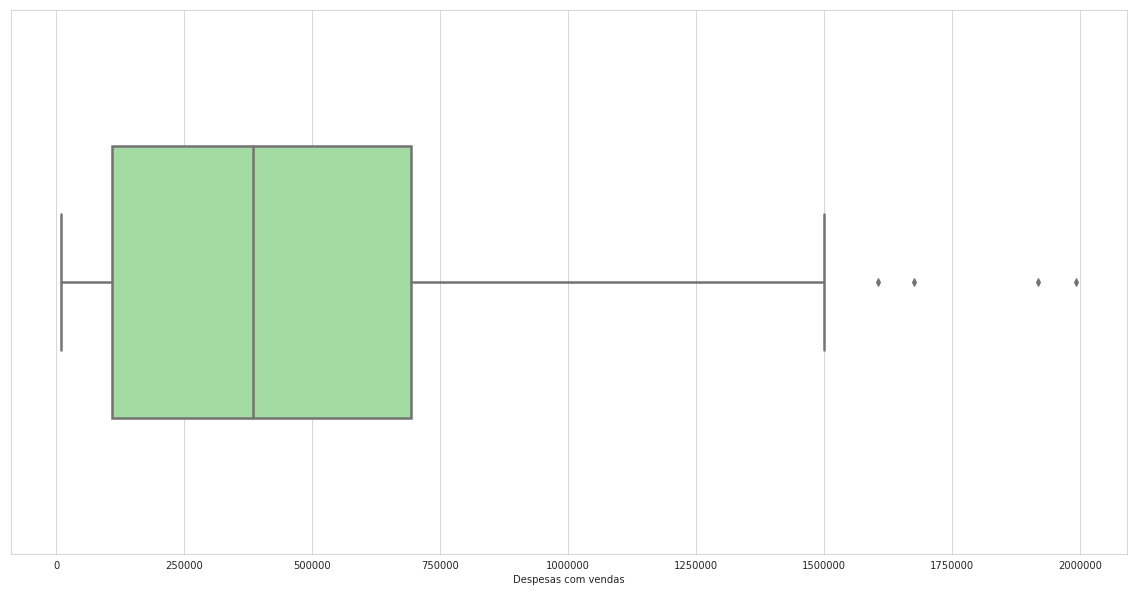

In [152]:
sns.set_style('whitegrid')

sns.set_palette('pastel')

plt.figure(figsize=(20,10))

sns.boxplot(df['Despesas com vendas'],linewidth=2.5, saturation=0.6, width=0.5, color='lightgreen')


plt.show()

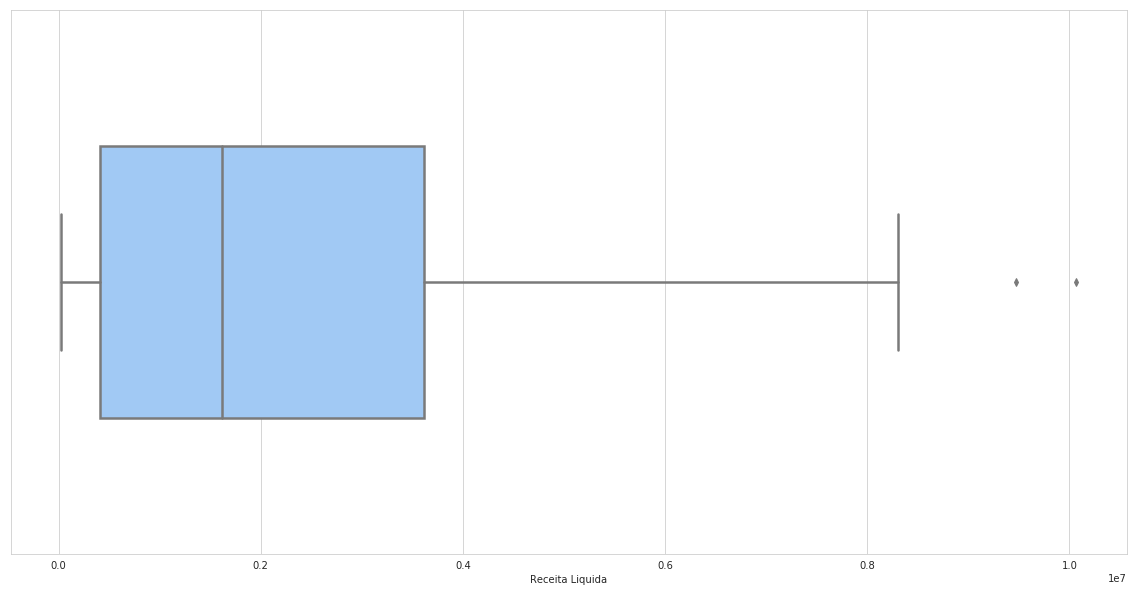

In [154]:
plt.figure(figsize=(20,10))

sns.boxplot(df['Receita Liquida'],linewidth=2.5, saturation=1, width=0.5)

plt.show()

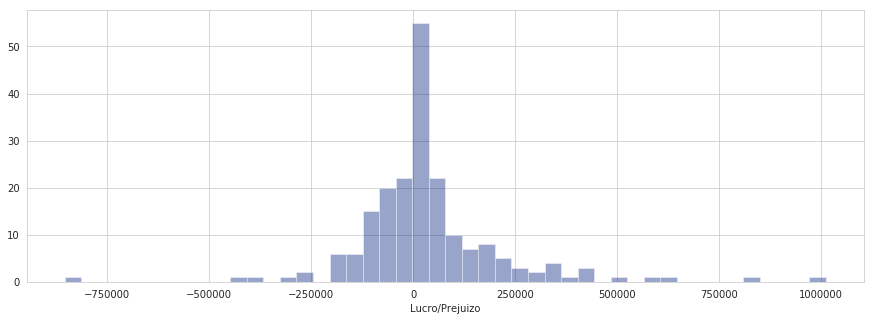

In [158]:
sns.set_palette('dark')

plt.figure(figsize=(15,5))

sns.distplot(df['Lucro/Prejuizo'], kde=False)

plt.show()